# Machine Learning Lab Enhancement
## Lab05 - Principal Component Analysis (PCA)
### Lab enhancement made by: **Khoo Jen-Au (1211102910)**
### Objectives:
1. Thoroughly explain what is Principal Component Analysis (PCA).
2. Apply real-world examples and use key concepts on datasets.

## What is Principal Component Analysis (PCA)
Principal component analysis is a dimensionality reduction technique used in data science and machine learning to simplify datasets while retaining as much information as possible.

It transforms a dataset with many features into smaller set of uncorrelated variables called **principal components**, which capture the maximum variance in the data.

Some key concepts include:
1. Dimentionality Reduction:
  - High dimensional datasets can be challenging to analyse, visualise and process, so PCA reduces the number of dimensions while preserving the significant patterns in the data.

2. Variance Maximisation:
  - PCA identifies directions (principal components) in the data where the variance (spread of data) is maximal. These components are prioritised based on the amount of variance they explain.

3. Orthogonality:
  - The principal components are orthogonal (uncorrelated) to each other, ensuring that they capture independent information.

4. Linear Transformation:
  - PCA is a linear method that projects data onto new axes aligned with the principal components.

## How it works:
1. Standardise the Data:

  - If features have different units or scales, they must be standardised (e.g., using z-scores) to ensure fair comparison.

2. Compute the Covariance Matrix:

  - The covariance matrix summarises the relationships between features.

3. Eigenvalue Decomposition:

  - Calculate the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors indicate the direction of the principal components, while eigenvalues measure their importance (variance explained).

4. Rank Principal Components:

  - Sort principal components by the magnitude of their eigenvalues. The first principal component (PC1) explains the most variance, followed by the second (PC2), and so on.

5. Project Data:

  - Transform the original data into the space defined by the top *k* principal components to reduce dimensionality.

If you do not understand that, it's totally fine! Let's explain how it works using an analogy.

## Real World Comparison

Imagine you have a large bookshelf with books of various types — novels, cookbooks, textbooks, comics, etc. However, the shelf is messy, and the books are scattered without order. You want to organise them in a way that:
1. Minimises clutter.
2. Makes it easier to find important categories.

We can apply PCA concepts that works in this scenario.

1. Data standardisation
  - Different types of books are of varying heights and thicknesses. You standardise them by focusing on content rather than physical size. In data terms, this means standardising features so no single feature (e.g., scale or unit) dominates.

2. Covariance Matrix (Relationships):
  - You examine how often books of one type (e.g., novels) are placed near books of another type (e.g., comics). This is like analysing the relationships (covariance) between features in your dataset.

3. Principal Components (Identifying Patterns):
  - PCA identifies common themes or groups in your collection. For example:
    - The first principal component might represent the contrast between "fiction" and "non-fiction."
    - The second principal component might capture whether books are "text-heavy" or "illustration-heavy."

4. Dimensionality Reduction (Focusing on Key Groups):
  - Instead of sorting books into 10 categories, you decide to focus on the top 2 most meaningful groupings (fiction vs. non-fiction, or text-heavy vs. illustration-heavy). This reduces complexity while preserving the essence of your collection.

5. Reorganizing the Shelf (Projection):
  - Finally, you reorganise the books based on these two new categories, making the collection more manageable and easier to navigate.

In this case, if PCA were a person, it would be a librarian who finds the main themes in your cluttered data and organises everything neatly so you can focus on what really matters!

## Why PCA Helps in Real Life
PCA focuses on what matters. It reduces "noise" by highlighting the most important aspects of your data. PCA also provides simplification. By transforming complex relationships into simpler components, PCA makes decision-making more straightforward. It also enhances efficiency, since fewer variables mean quicker analyses and less computational overhead.

## Applications of PCA in Modeling

1. Data Visualization:
  - PCA is commonly used to project high-dimensional data into 2D or 3D spaces for visualisation, making it easier to understand the structure or clusters in the data.

2. Pre-processing for Machine Learning:
  - PCA reduces feature dimensions, which can:
    - Speed up training and inference.
    - Mitigate overfitting in models.
    - Improve model interpretability.

3. Noise Reduction:
  - By retaining only the principal components with significant eigenvalues, PCA removes components likely representing noise.

4. Feature Engineering:
  - The principal components themselves can be used as new features, often revealing underlying patterns in the data.

In [ ]:
# Linking google drive (comment out below if not needed)

from google.colab import drive
import os

drive.mount('/content/drive', force_remount = True)

notebook_path = r"/content/drive/MyDrive/Colab Notebooks/Lab Enhancement/"
os.chdir(notebook_path)
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Lab Enhancement


## Data Exploration - Abalone Dataset

This dataset was retrieved from https://archive.ics.uci.edu/dataset/1/abalone. In the Abalone dataset are physical measurements taken from several thousand Tasmanian abalone.



In [ ]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# These are the libraries used for this PCA task
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the abalone dataset
df = pd.read_csv('abalone.csv')

# Display the first few rows and basic information about the dataset
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
 0    M         0.455     0.365   0.095       0.5140         0.2245   
 1    M         0.350     0.265   0.090       0.2255         0.0995   
 2    F         0.530     0.420   0.135       0.6770         0.2565   
 3    M         0.440     0.365   0.125       0.5160         0.2155   
 4    I         0.330     0.255   0.080       0.2050         0.0895   
 
    VisceraWeight  ShellWeight  Rings  
 0         0.1010        0.150     15  
 1         0.0485        0.070      7  
 2         0.1415        0.210      9  
 3         0.1140        0.155     10  
 4         0.0395        0.055      7  ,
 None,
        LongestShell     Diameter       Height  WholeWeight  ShuckedWeight  \
 count   4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
 mean       0.523992     0.407881     0.139516     0.828742       0.359367   
 std        0.120093     0.099240     0.041827     0.490389       0.221963   
 min        

The dataset has 9 columns, 1 categorical (`gender`), 7 numerical columns (e.g., `LongestShell`, `Diameter`, `WholeWeight`), and 1 target column (`Rings`), which correlates with the age of the abalone.

It has no missing values, however the values have a significant variation in measurements, so we have to standardise it before performing PCA.

In [ ]:
# Pre-processing the data

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Type' column
label_encoder = LabelEncoder()
df['Type_Encoded'] = label_encoder.fit_transform(df['Type'])

# Select numerical features for PCA
numerical_features = [
    'LongestShell', 'Diameter', 'Height', 'WholeWeight',
    'ShuckedWeight', 'VisceraWeight', 'ShellWeight'
]

# Standardising the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])

# Confirm preprocessing results
df[['Type', 'Type_Encoded']].head(), pd.DataFrame(df_scaled, columns=numerical_features).head()

(  Type  Type_Encoded
 0    M             2
 1    M             2
 2    F             0
 3    M             2
 4    I             1,
    LongestShell  Diameter    Height  WholeWeight  ShuckedWeight  \
 0     -0.574558 -0.432149 -1.064424    -0.641898      -0.607685   
 1     -1.448986 -1.439929 -1.183978    -1.230277      -1.170910   
 2      0.050033  0.122130 -0.107991    -0.309469      -0.463500   
 3     -0.699476 -0.432149 -0.347099    -0.637819      -0.648238   
 4     -1.615544 -1.540707 -1.423087    -1.272086      -1.215968   
 
    VisceraWeight  ShellWeight  
 0      -0.726212    -0.638217  
 1      -1.205221    -1.212987  
 2      -0.356690    -0.207139  
 3      -0.607600    -0.602294  
 4      -1.287337    -1.320757  )

Preprocessing Results:
1. Encoded Type:
  - The Type column has been converted into numerical values:
    - `M` → 2
    - `F` → 0
    - `I` → 1

2. Standardized Numerical Features:
  - All numerical features have been scaled to have a mean of 0 and a standard deviation of 1, ensuring they contribute equally to PCA.


Since PCA is tend to be used in unsupervised learning, the labels will not be used in this. The reason why is because it does not rely on labels or target variables. Instead, it focuses on uncovering the underlying structure or patterns in the data.

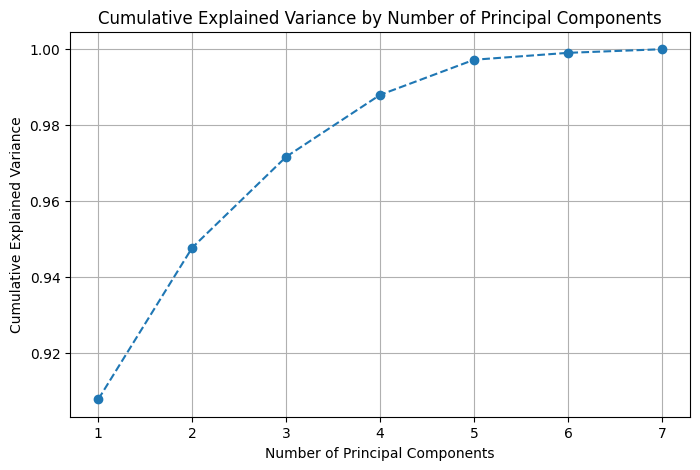

array([0.90787315, 0.03991891, 0.02390638, 0.01629598, 0.00923627,
       0.0018183 , 0.00095101])

In [ ]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Display the explained variance ratio for each component
explained_variance_ratio

PCA Results:
1. Cumulative Explained Variance:
  - The first principal component explains 90.79% of the variance.
  - Adding the second principal component increases the explained variance to 94.78%.
  - The first three components together explain 97.17% of the variance.

2. Insights:
  - Most of the variance is captured by the first few components, indicating significant redundancy in the original features.

Once we have our results, we can start to choose our number of components for our PCA. Based on the explained variance plot, selecting the first 2 to 3 components seems sufficient. Then, we can transform the dataset by project the original data into the reduced-dimensional space using the chosen components.

In [ ]:
# Transform the data using the top 3 principal components
n_components = 3
pca_reduced = PCA(n_components=n_components)
reduced_data = pca_reduced.fit_transform(df_scaled)

# Create a DataFrame for the reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

reduced_data_df.head()

,PC1,PC2,PC3
0,-1.756019,-0.390532,0.329928
1,-3.362734,-0.105153,-0.252264
2,-0.482338,0.252055,0.443918
3,-1.509041,0.207608,0.000519
4,-3.654006,-0.272819,-0.275035


In [ ]:
# Add the target variable (Rings) and encoded Type for reference
reduced_data_df['Rings'] = df['Rings']
reduced_data_df['Type_Encoded'] = df['Type_Encoded']

# Display the first few rows of the reduced data
reduced_data_df.head()

,PC1,PC2,PC3,Rings,Type_Encoded
0,-1.756019,-0.390532,0.329928,15,2
1,-3.362734,-0.105153,-0.252264,7,2
2,-0.482338,0.252055,0.443918,9,0
3,-1.509041,0.207608,0.000519,10,2
4,-3.654006,-0.272819,-0.275035,7,1


Notice how the dataset was reduced from 8 columns to 5? 3 columns of PCA components and the remaining 2 are `Rings` and `Type_Encoded`, which are a target variable and reference column respectively.

## PCA for Feature Engineering

PCA can be used in feature engineering. It can be a powerful way to enhance models or gain insights into the data.

There are 2 ways:

1. Use it as a descriptive technique:
  - Since the components tell you about the variation, you could compute the Mutual Information (MI) scores for the components and see what kind of variation is most predictive of your target.
  - That could give you ideas for kinds of features to create, for example, a product of `Height` and `Diameter` if `Size` is important, say, or a ratio of `Height` and `Diameter` if `Shape` is important. You could even try clustering on one or more of the high-scoring components.

2. Use the components themselves as features:
  - Because the components expose the variational structure of the data directly, they can often be more informative than the original features.

PCA basically gives you direct access to the correlational structure of your data. You can come up with applications of your own!

## Future Work

1. Compute MI Scores for PCA Components
  - Ensure Principal Components and Target Variable Are Ready
    - Use the PCA-transformed data (PC1, PC2, ...) as features.
    - Use the target variable (Rings) as the response.
  - Compute Mutual Information
    - MI measures the dependency between each feature (component) and the target variable.
  - Interpret Results
    - Components with higher MI scores are more predictive of the target.
    - These scores indicate which types of variation (captured by specific principal components) are most relevant to predicting Rings.
  - Extra:
    - Visualize MI Scores: Use a bar plot to rank the components by their MI scores.

2. Using PCA Components as Features
  - Dimensionality Reduction for Supervised Learning
    - Use the reduced components as input features for supervised models (e.g., regression or classification).
  - Clustering with PCA Components
    - Use the reduced components for clustering algorithms like k-means to identify groupings in the data.